# Solution to Homework 1

## FINM 35700 - Spring 2025

### UChicago Financial Mathematics

* Alex Popovici
* alex.popovici@uchicago.edu

This homework relies on:

- the government and corporate bonds symbology file `bond_symbology`, 
- the "on-the-run" treasuries data file `govt_on_the_run` and
- the market data file `bond_market_prices_eod`.


You can find more details on US treasury instruments in the FINM 37400 Fixed Income course.



In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Problem 1: Explore symbology for US treasuries and corporate bonds

## a. Load and explore US government bond symbology

Load the `bond_symbology` Excel file into a dataframe. It contains symbology for both government and corporate bonds as of 2024-12-13.

Select US Treasury bonds only (class = 'Govt', ticker = 'T'). For each government bond issue, calculate its initial `term` in years (based on issue date and maturity date), as well as the current `TTM` (time-to-maturity) and extend the dataframe. Assume a year has 365.25 days.


In [122]:
# Load bond_symbology.xlsx
bond_symbology = pd.read_excel('./data/bond_symbology.xlsx')

# Set as-of-date
as_of_date = pd.to_datetime('2024-12-13')

# Add term and TTM columns
bond_symbology['term'] = round((bond_symbology['maturity'] - bond_symbology['start_date']).dt.days / 365.25, 2)
bond_symbology['TTM'] = round((bond_symbology['maturity'] - as_of_date).dt.days / 365.25, 2)

# Create Govt bonds symbology df
govt_symbology = bond_symbology[(bond_symbology['class'] == 'Govt') 
                                   & (bond_symbology['ticker'] == 'T')].copy()

# Display govt_symbology
display(govt_symbology.tail())



,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
715,T,Govt,BBG01QZFYJV6,US91282CLY56,US91282CLY56,T 4 1/4 11/30/26,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.99,1.96
716,T,Govt,BBG01QZFYD58,US91282CMA61,US91282CMA61,T 4 1/8 11/30/29,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.99,4.96
717,T,Govt,BBG01QZFYCF9,US91282CLZ22,US91282CLZ22,T 4 1/8 11/30/31,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.99,6.96
718,T,Govt,BBG01QVTC1Y0,US912810UF39,US912810UF39,T 4 5/8 11/15/44,US TREASURY N/B,US GOVERNMENT,4.625,FIXED,...,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.95,19.92
719,T,Govt,BBG01R4Z7Y32,US91282CMB45,US91282CMB45,T 4 12/15/27,US TREASURY N/B,US GOVERNMENT,4.000,FIXED,...,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,3.00,3.00


## b. Historical time series of US treasury coupons 

Plot the time series of coupons for for US treasury notes/bonds issued since 2015 (indexed by issue date). 
What can you say about the overall level of issued coupons since 2020?

<Axes: title={'center': 'US Treasury coupons by issue date (since 2015)'}, xlabel='start_date'>

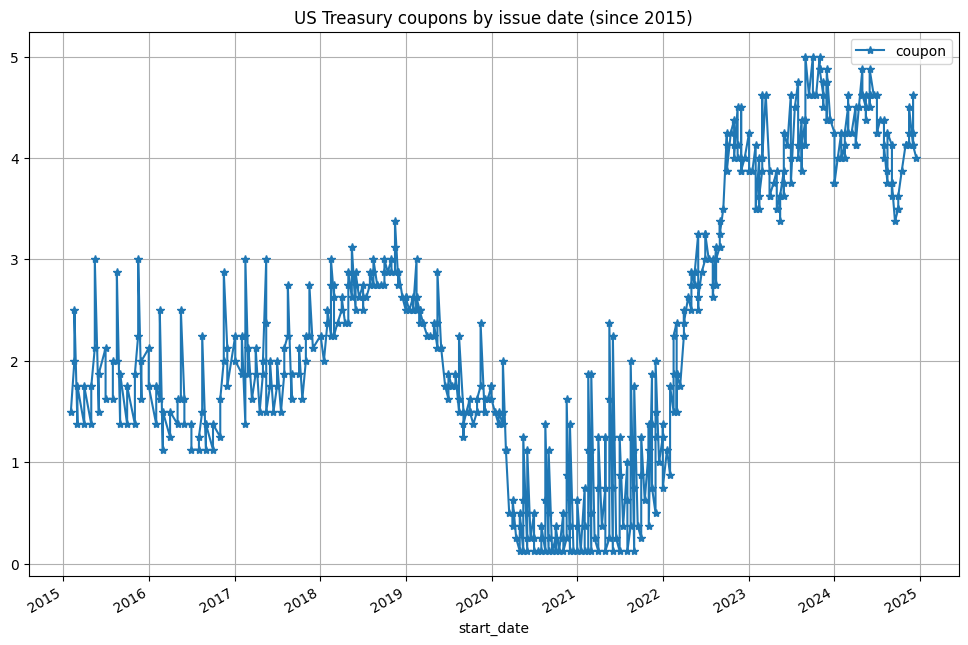

In [123]:
# Jan 2015 cut-off date
cut_off_date_2015 = pd.to_datetime('2015-01-02')
govt_symbology_since_2015 = govt_symbology[govt_symbology['start_date'] >= cut_off_date_2015].copy()

# sort by start date
govt_symbology_since_2015.sort_values(by='start_date', inplace=True)

# Plot the US Treasury coupons by issue/start date (since 2015)
govt_symbology_since_2015.plot(x='start_date', y='coupon', grid=True, style='-*', title='US Treasury coupons by issue date (since 2015)', figsize=(12,8))

,start_date,coupon
count,295,295.000000
mean,2022-07-05 17:39:15.254237184,2.570339
min,2020-01-15 00:00:00,0.125000
25%,2021-04-07 12:00:00,0.875000
50%,2022-06-30 00:00:00,3.000000
75%,2023-10-02 00:00:00,4.125000
max,2024-12-16 00:00:00,5.000000
std,NaN,1.669119


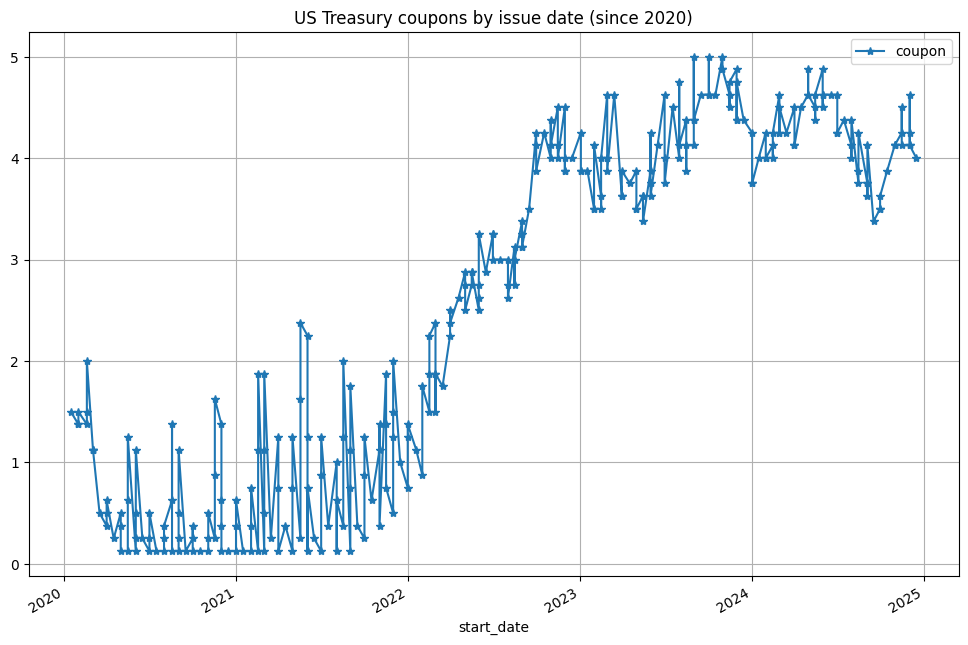

In [124]:
# Jan 2020 cut-off date
cut_off_date_2020 = pd.to_datetime('2020-01-02')
govt_symbology_since_2020 = govt_symbology[govt_symbology['start_date'] >= cut_off_date_2020].copy()

# sort by start date
govt_symbology_since_2020.sort_values(by='start_date', inplace=True)

# Plot the US Treasury coupons by issue date (since 2020)
govt_symbology_since_2020.plot(x='start_date', y='coupon', grid=True, style='-*', title='US Treasury coupons by issue date (since 2020)', figsize=(12,8))

# describe
govt_symbology_since_2020[['start_date', 'coupon']].describe()

What can you say about the overall level of issued coupons since 2020?

Based on the summary statistics provided, we can make following observations:

- The average (mean) coupon rate is 2.57.
- The median coupon rate (50th percentile) is 3
- The minimum coupon rate is 0.125, while the maximum is 5.00.
- The coupon rate increased from decade lows of 0.125 in 2020, to decade highs of 5.00 in 2024.

## c. Load the on-the-run US treasuries

Load the `govt_on_the_run` Excel file into a dataframe. Select the current on-the-run 2Y, 3Y, 5Y, 7Y, 10Y, 20Y and 30Y issues (off-the-run issues have the B & C suffix). Create a separate symbology dataframe for on-the-run treasuries only, to be used later on for the on-the-run government yield curve bootstrapping.

In [125]:
# Load govt_on_the_run, as of 2024-12-13
govt_on_the_run = pd.read_excel('./data/govt_on_the_run.xlsx')

# Keep OTR treasuries only: exclude off-the-run issues, which have the B & C suffix
govt_on_the_run_simple = govt_on_the_run[~govt_on_the_run['ticker'].str.contains('B|C')]
display(govt_on_the_run_simple)

,ticker,date,figi,isin
0,GT10 Govt,2024-12-13,BBG01QKHSMP5,US91282CLW90
3,GT2 Govt,2024-12-13,BBG01QZFYJV6,US91282CLY56
4,GT20 Govt,2024-12-13,BBG01QVTC1Y0,US912810UF39
9,GT3 Govt,2024-12-13,BBG01R4Z7Y32,US91282CMB45
10,GT30 Govt,2024-12-13,BBG01QKHSL31,US912810UE63
15,GT5 Govt,2024-12-13,BBG01QZFYD58,US91282CMA61
18,GT7 Govt,2024-12-13,BBG01QZFYCF9,US91282CLZ22


In [126]:
# Create symbology for on-the-run treasuries only
govt_symbology_otr = govt_symbology[govt_symbology['isin'].isin(govt_on_the_run_simple['isin'])]
govt_symbology_otr = govt_symbology_otr.sort_values(by='TTM')
display(govt_symbology_otr)

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
715,T,Govt,BBG01QZFYJV6,US91282CLY56,US91282CLY56,T 4 1/4 11/30/26,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.99,1.96
719,T,Govt,BBG01R4Z7Y32,US91282CMB45,US91282CMB45,T 4 12/15/27,US TREASURY N/B,US GOVERNMENT,4.000,FIXED,...,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,3.00,3.00
716,T,Govt,BBG01QZFYD58,US91282CMA61,US91282CMA61,T 4 1/8 11/30/29,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.99,4.96
717,T,Govt,BBG01QZFYCF9,US91282CLZ22,US91282CLZ22,T 4 1/8 11/30/31,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.99,6.96
713,T,Govt,BBG01QKHSMP5,US91282CLW90,US91282CLW90,T 4 1/4 11/15/34,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-15,2034-11-15,NORMAL,Unsecured,91486.0,US,USD,ACTV,10.00,9.92
718,T,Govt,BBG01QVTC1Y0,US912810UF39,US912810UF39,T 4 5/8 11/15/44,US TREASURY N/B,US GOVERNMENT,4.625,FIXED,...,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.95,19.92
714,T,Govt,BBG01QKHSL31,US912810UE63,US912810UE63,T 4 1/2 11/15/54,US TREASURY N/B,US GOVERNMENT,4.500,FIXED,...,2024-11-15,2054-11-15,NORMAL,Unsecured,53231.0,US,USD,ACTV,30.00,29.92


## d. Compute the total amount of US Treasuries issued / matured every year since 2015

Column `amt_out` contains the issue amount outstanding, expressed in $MM.

Compute the total amount of US Treasuries issued every year since 2015.
Compute the total amount of US Treasuries matured every year since 2015.

Plot the results.

,year,amount_issued,amount_matured
0,2015,988924.0,NaN
1,2016,1217460.0,NaN
2,2017,1330458.0,NaN
3,2018,1940847.0,NaN
4,2019,2322466.0,NaN
5,2020,3558513.0,609714.0
6,2021,4601404.0,2068029.0
7,2022,3251806.0,2249135.0
8,2023,3028042.0,2631092.0
9,2024,3827422.0,2629231.0


<Axes: title={'center': 'US Treasuries Amounts ($MM): issued vs matured'}, xlabel='year'>

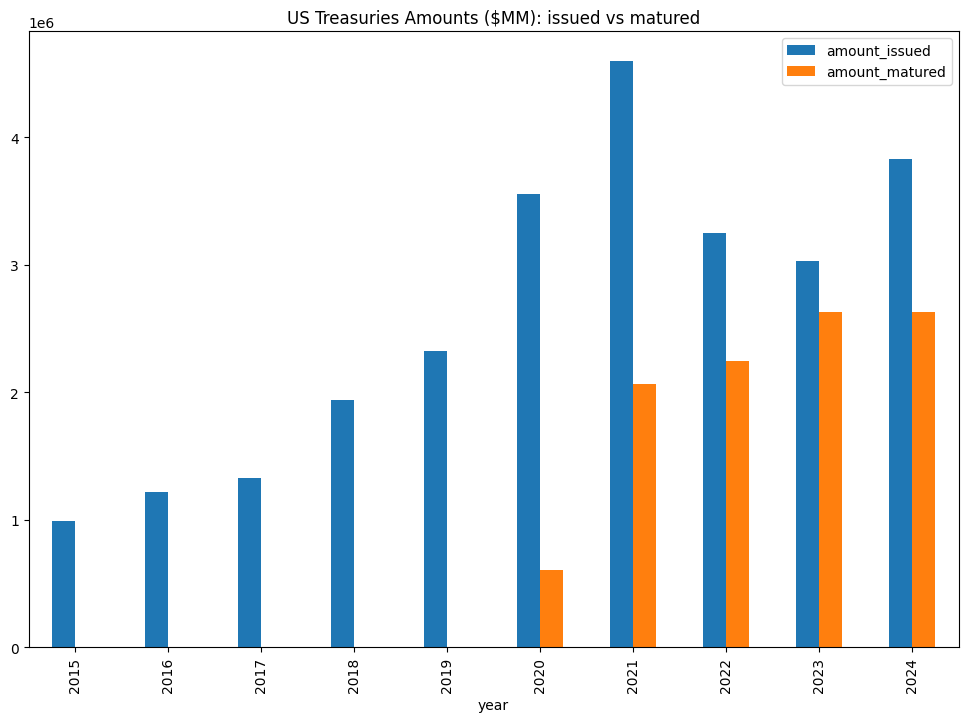

In [153]:
# Compute the total amount of US Treasuries issued and matured every year, since 2015.

govt_symbology['start_year'] = govt_symbology['start_date'].dt.year
govt_symbology['maturity_year'] = govt_symbology['maturity'].dt.year

# aggregat issued amounts in $MM (million USD)
tsy_amount_issued = govt_symbology[['start_year', 'amt_out']].groupby('start_year').sum()
tsy_amount_issued.reset_index(drop=False, inplace=True)
tsy_amount_issued.rename(columns={"start_year": "year", "amt_out": "amount_issued"}, inplace=True)
tsy_amount_issued = tsy_amount_issued[(tsy_amount_issued['year'] >= 2015) & (tsy_amount_issued['year'] < 2025)]
# display(tsy_amount_issued)

# aggregat matured amounts in $MM (million USD)
# here there is a gap in the input data for maturities < 2020
tsy_amount_matured = govt_symbology[['maturity_year', 'amt_out']].groupby('maturity_year').sum()
tsy_amount_matured.reset_index(drop=False, inplace=True)
tsy_amount_matured.rename(columns={"maturity_year": "year", "amt_out": "amount_matured"}, inplace=True)
tsy_amount_matured = tsy_amount_matured[(tsy_amount_matured['year'] >= 2015) & (tsy_amount_matured['year'] < 2025)]
# display(tsy_amount_matured)

# tsy_amount_issued_and_matured
tsy_amount_issued_and_matured = pd.merge(tsy_amount_issued,tsy_amount_matured,how='outer')
display(tsy_amount_issued_and_matured)

# Plot the results.
tsy_amount_issued_and_matured.plot.bar(x='year', title='US Treasuries Amounts ($MM): issued vs matured', figsize=(12,8))

------------------------------------------------------------------------------------------
# Problem 2: Explore symbology for corporate bonds

## a. Load and explore US corporate bonds symbology data

Starting from the `bond_symbology` dataframe, create a corporate bond dataframe containing
* corporate bond only  (class = "Corp"),
* senior unsecured (rank = "Sr Unsecured"),
* fixed coupon (cpn_type="FIXED")
* maturity date <= 2055-12-31

bonds only, with following columns:



| ticker | isin | figi | security | name | coupon | start_date | maturity | amt_out | term | TTM |
|----------|-------|-------|-------------|-----|----------|---------|---------|---------|---------|---------|

where 
* `term` refers to the initial term/time-to-maturity in years
* `TTM` refers to the current time-to-maturity in years

Display the dataframe.

In [128]:
# Create Corp bonds symbology df
corp_symbology = bond_symbology[bond_symbology['class'] == 'Corp'].copy()

corp_symbology = corp_symbology[(corp_symbology['rank'] == 'Sr Unsecured')
                                   & (corp_symbology['cpn_type'] == 'FIXED')
                                   & (corp_symbology['maturity'] <= '2055-12-31')]

# Keep selected columns only
corp_symbology = corp_symbology[['ticker', 'isin', 'figi', 'security', 'name', 'coupon', 'start_date', 'maturity', 'amt_out', 'term', 'TTM']]

# Display corp_symbology_vz
display(corp_symbology)

,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term,TTM
0,AAPL,US037833AL42,BBG004HST0K7,AAPL 3.85 05/04/43,APPLE INC,3.850,2013-05-03,2043-05-04,3000.0,30.0,18.39
1,AAPL,US037833AT77,BBG006F8VWJ7,AAPL 4.45 05/06/44,APPLE INC,4.450,2014-05-06,2044-05-06,1000.0,30.0,19.39
2,AAPL,US037833BA77,BBG0081TNL50,AAPL 3.45 02/09/45,APPLE INC,3.450,2015-02-09,2045-02-09,2000.0,30.0,20.16
3,AAPL,US037833BH21,BBG008N1BQC1,AAPL 4 3/8 05/13/45,APPLE INC,4.375,2015-05-13,2045-05-13,2000.0,30.0,20.41
4,AAPL,US037833BY53,BBG00C7QB7Q2,AAPL 3 1/4 02/23/26,APPLE INC,3.250,2016-02-23,2026-02-23,3250.0,10.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...
129,ORCL,US68389XCP87,BBG01DZ9FPR1,ORCL 4.9 02/06/33,ORACLE CORP,4.900,2023-02-06,2033-02-06,1500.0,10.0,8.15
130,ORCL,US68389XCQ60,BBG01DZ9FPY3,ORCL 5.55 02/06/53,ORACLE CORP,5.550,2023-02-06,2053-02-06,2250.0,30.0,28.15
131,ORCL,US68389XCS27,BBG01Q0P7VR0,ORCL 4.2 09/27/29,ORACLE CORP,4.200,2024-09-27,2029-09-27,1500.0,5.0,4.79
132,ORCL,US68389XCT00,BBG01Q0P7W61,ORCL 4.7 09/27/34,ORACLE CORP,4.700,2024-09-27,2034-09-27,1750.0,10.0,9.79


## b. Explore aggregated issue amount outstanding by issuer

Compute the total issue (face) amount outstanding for each issuer and display the results.

,amt_out
ticker,
AAPL,71100.000
DIS,25062.036
IBM,28284.172
ORCL,69240.435


<Axes: title={'center': 'Corp Bonds: issue amounts outstanding ($MM)'}, xlabel='ticker'>

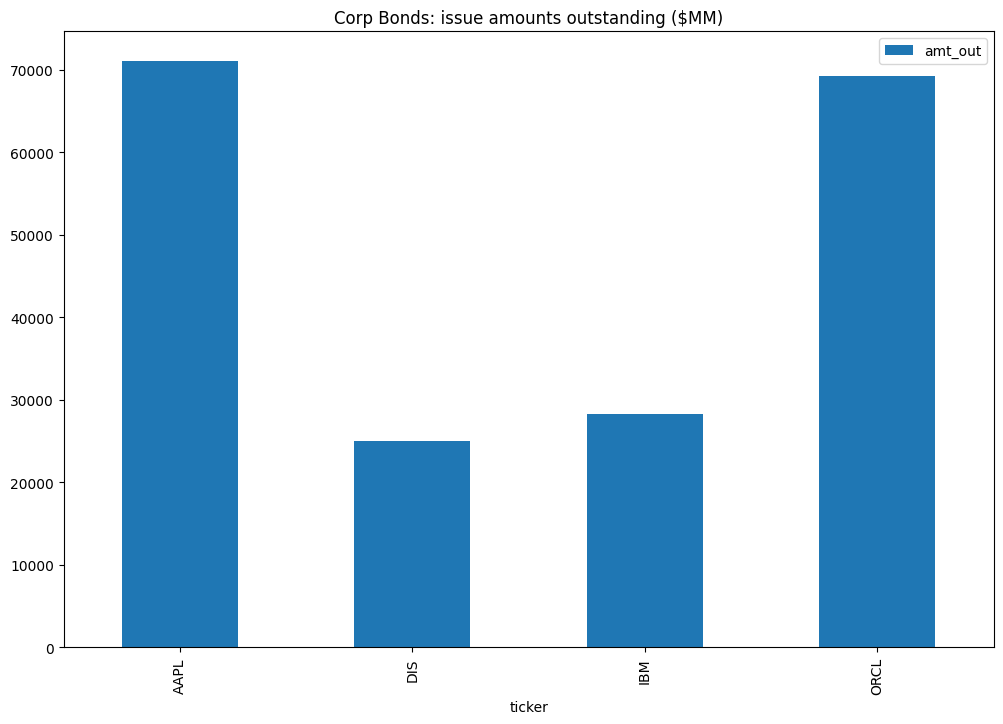

In [152]:
# aggregate issue/face amount by issuer/ticker
corp_issue_amount_agg = corp_symbology[['ticker', 'amt_out']].groupby('ticker').sum()

display(corp_issue_amount_agg)

# Plot the results.
corp_issue_amount_agg.plot.bar(title='Corp Bonds: issue amounts outstanding ($MM)', figsize=(12,8))

## c. Display the bond details for Disney

Create a separate dataframe for Disney issuer only (ticker = 'DIS') and display it.

Compute following aggregated metrics for DIS:
* average coupon
* average term and
* average TTM.

In [147]:
# Create a separate dataframe for Disney issuer
corp_symbology_dis =  corp_symbology[corp_symbology['ticker'] == 'DIS']

# Display it
display(corp_symbology_dis)

# describe
corp_symbology_dis.describe()


,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term,TTM
43,DIS,USU25497AR66,BBG00N3BD9G0,DIS 7 1/8 04/08/28,WALT DISNEY COMPANY/THE,7.125,2019-03-20,2028-04-08,10.285,9.05,3.32
44,DIS,USU25497AW51,BBG00N3BZ921,DIS 8.45 08/01/34,WALT DISNEY COMPANY/THE,8.450,2019-03-20,2034-08-01,1.000,15.37,9.63
47,DIS,US254687FL52,BBG00Q5D3237,DIS 2 09/01/29,WALT DISNEY COMPANY/THE,2.000,2019-09-06,2029-09-01,2000.000,9.99,4.72
48,DIS,US254687FM36,BBG00Q5D3246,DIS 2 3/4 09/01/49,WALT DISNEY COMPANY/THE,2.750,2019-09-06,2049-09-01,2000.000,29.99,24.72
49,DIS,US254687DK97,BBG00QNKGJP6,DIS 3 3/8 11/15/26,WALT DISNEY COMPANY/THE,3.375,2019-11-22,2026-11-15,436.285,6.98,1.92
50,DIS,US254687DV52,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.550,2019-11-22,2033-03-15,342.347,13.31,8.25
51,DIS,US254687DZ66,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.200,2019-11-22,2034-12-15,982.472,15.06,10.00
52,DIS,US254687EB89,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.400,2019-11-22,2035-12-15,971.816,16.06,11.00
53,DIS,US254687EF93,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.150,2019-11-22,2037-03-01,320.934,17.27,12.21
54,DIS,US254687EH59,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.650,2019-11-22,2037-11-15,1223.938,17.98,12.92


,coupon,start_date,maturity,amt_out,term,TTM
count,25.000000,25,25,25.000000,25.000000,25.000000
mean,4.797000,2019-12-20 04:48:00,2037-08-18 07:40:48,1002.481440,17.662400,12.678800
min,1.750000,2019-03-20 00:00:00,2026-01-13 00:00:00,1.000000,5.670000,1.080000
25%,3.500000,2019-11-22 00:00:00,2030-03-22 00:00:00,399.892000,10.000000,5.270000
50%,4.750000,2019-11-22 00:00:00,2037-03-01 00:00:00,750.000000,17.270000,12.210000
75%,6.200000,2020-03-23 00:00:00,2044-09-15 00:00:00,1500.000000,24.820000,19.760000
max,8.450000,2020-05-13 00:00:00,2051-01-13 00:00:00,2750.000000,30.670000,26.080000
std,1.855248,NaN,NaN,760.709787,8.055224,8.055082


Aggregated metrics for DIS:
* average coupon: 4.797
* average term: 17.66
* average TTM: 12.68

## d. Explore term structure of issue amounts outstanding for Disney.

Plot the issue amount outstanding by TTM for Disney.

<Axes: title={'center': 'Disney: issue amounts outstanding ($MM)'}, xlabel='TTM'>

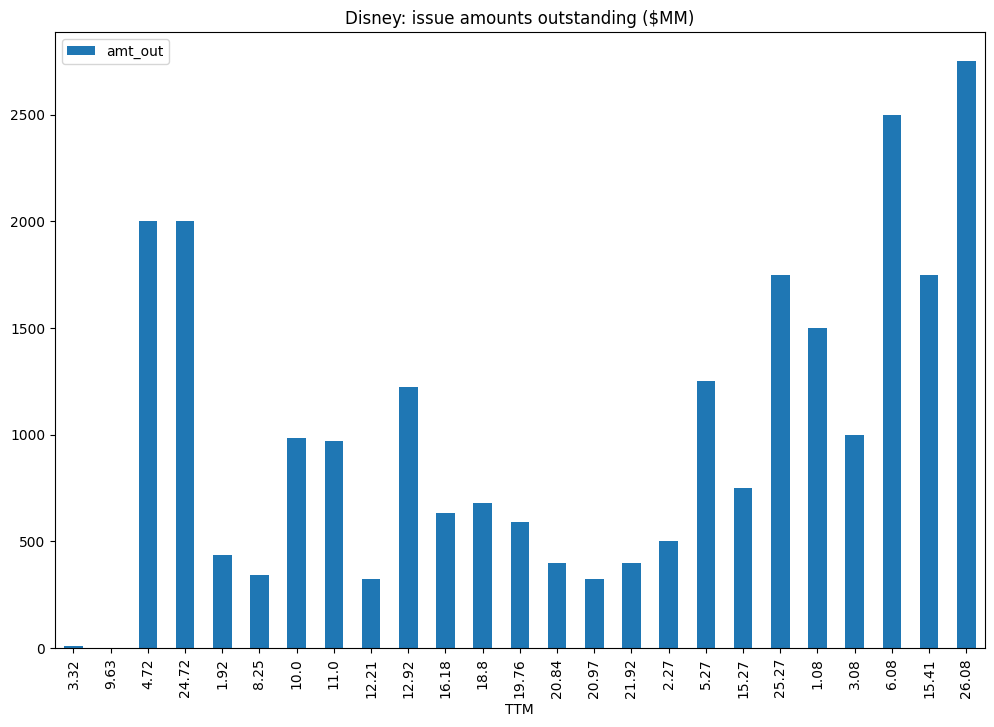

In [151]:
# Plot the results.
corp_symbology_dis.plot.bar(x='TTM', y='amt_out', title='Disney: issue amounts outstanding ($MM)', figsize=(12,8))

------------------------------------------------------------------------------------------
# Problem 3: Explore EOD market prices and yields

## a. Load and explore treasury market prices and yields

Load the `bond_market_prices_eod` Excel file into a dataframe. It provides market data for US treasuries and corporate bonds as of 2024-12-13.

Merge the treasuries symbology dataframe with the market data and add the following columns:


| date | bidPrice | askPrice | midPrice | bidYield | askYield | midYield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

Plot a graph/scatter plot of treasury mid yields by TTM.


In [132]:
# Load bond_market_prices_eod
bond_market_prices_eod = pd.read_excel('./data/bond_market_prices_eod.xlsx')

bond_market_prices_eod['midPrice'] = 0.5*(bond_market_prices_eod['bidPrice'] + bond_market_prices_eod['askPrice'])
bond_market_prices_eod['midYield'] = 0.5*(bond_market_prices_eod['bidYield'] + bond_market_prices_eod['askYield'])

display(bond_market_prices_eod.head())


,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield
0,2024-12-13,Corp,AAPL,US037833BX70,BBG00C7QBG91,93.228,93.809,1.4595,5.180,5.132,93.5185,5.1560
1,2024-12-13,Corp,AAPL,US037833EK23,BBG011ZS1X57,63.723,64.232,0.9835,5.242,5.194,63.9775,5.2180
2,2024-12-13,Corp,AAPL,US037833DW79,BBG00TN2PN26,63.716,64.215,0.2585,5.253,5.205,63.9655,5.2290
3,2024-12-13,Corp,AAPL,US037833EF38,BBG00Z3VQ626,63.262,63.766,0.9420,5.249,5.200,63.5140,5.2245
4,2024-12-13,Corp,AAPL,US037833CD08,BBG00DHQX9M5,82.278,82.848,1.4120,5.227,5.177,82.5630,5.2020


,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,start_year,maturity_year,date,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield
0,T,Govt,BBG000FJ0QD9,US912810FF04,US91282CMB45,T 5 1/4 11/15/28,US TREASURY N/B,US GOVERNMENT,5.250,FIXED,...,1998,2028,2024-12-13,103.4141,103.8828,0.44925,4.292,4.164,103.64845,4.2280
1,T,Govt,BBG000FVQ8V4,US912810FJ26,US91282CMA61,T 6 1/8 08/15/29,US TREASURY N/B,US GOVERNMENT,6.125,FIXED,...,1999,2029,2024-12-13,107.6328,108.1172,2.04690,4.300,4.190,107.87500,4.2450
2,T,Govt,BBG000FYM9P7,US912810FM54,US91282CMA61,T 6 1/4 05/15/30,US TREASURY N/B,US GOVERNMENT,6.250,FIXED,...,2000,2030,2024-12-13,109.2188,109.6484,0.53520,4.321,4.236,109.43360,4.2785
3,T,Govt,BBG000FZB1J0,US912810FP85,US91282CMA61,T 5 3/8 02/15/31,US TREASURY N/B,US GOVERNMENT,5.375,FIXED,...,2001,2031,2024-12-13,105.7500,106.1563,1.79685,4.302,4.229,105.95315,4.2655
4,T,Govt,BBG000FLF6H8,US912810FT08,US91282CLW90,T 4 1/2 02/15/36,US TREASURY N/B,US GOVERNMENT,4.500,FIXED,...,2006,2036,2024-12-13,101.4375,101.7031,1.50390,4.336,4.306,101.57030,4.3210


<Axes: title={'center': 'US Treasury Yields by TTM'}, xlabel='TTM'>

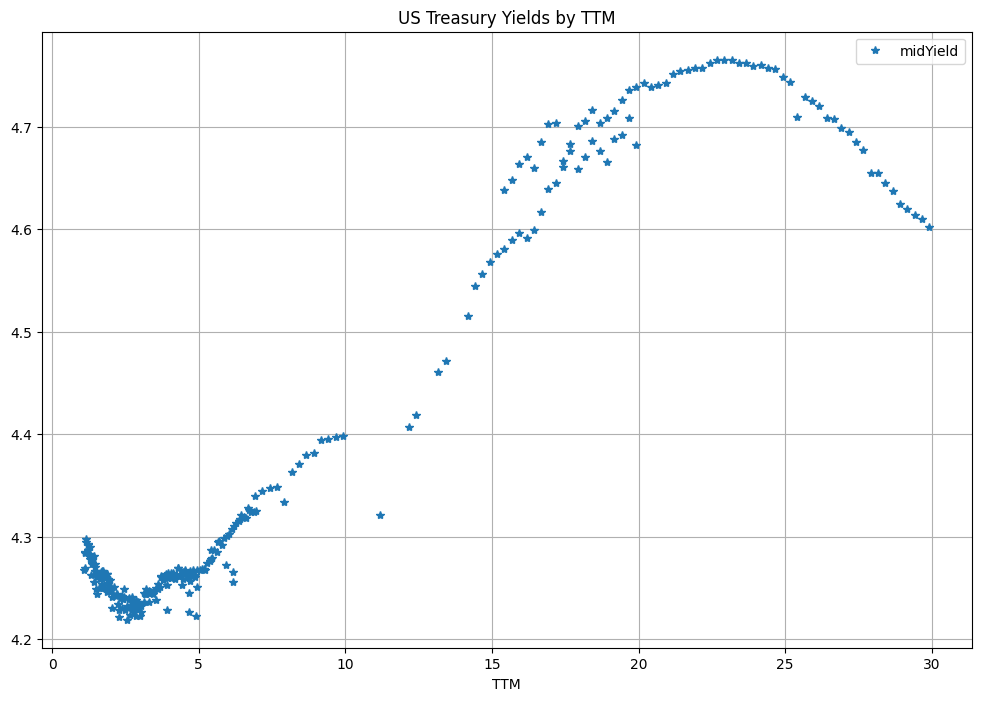

In [150]:
# Merge market data as of 2024-12-13 into treasury symbology
govt_agg = govt_symbology.merge(bond_market_prices_eod,  on=['class','ticker','figi','isin'])

display(govt_agg.head())

# Plot a graph/scatter plot of treasury mid yields by TTM
govt_agg.plot(x='TTM', y='midYield', grid=True, style='*', title='US Treasury Yields by TTM', figsize=(12,8))

## b. Explore on-the-run treasuries only
Create a separate joint dataframe for on-the-run treasuries only.

Plot a graph/scatter plot of on-the-run treasury mid yields by TTM.

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
715,T,Govt,BBG01QZFYJV6,US91282CLY56,US91282CLY56,T 4 1/4 11/30/26,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.99,1.96
719,T,Govt,BBG01R4Z7Y32,US91282CMB45,US91282CMB45,T 4 12/15/27,US TREASURY N/B,US GOVERNMENT,4.000,FIXED,...,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,3.00,3.00
716,T,Govt,BBG01QZFYD58,US91282CMA61,US91282CMA61,T 4 1/8 11/30/29,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.99,4.96
717,T,Govt,BBG01QZFYCF9,US91282CLZ22,US91282CLZ22,T 4 1/8 11/30/31,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.99,6.96
713,T,Govt,BBG01QKHSMP5,US91282CLW90,US91282CLW90,T 4 1/4 11/15/34,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-15,2034-11-15,NORMAL,Unsecured,91486.0,US,USD,ACTV,10.00,9.92
718,T,Govt,BBG01QVTC1Y0,US912810UF39,US912810UF39,T 4 5/8 11/15/44,US TREASURY N/B,US GOVERNMENT,4.625,FIXED,...,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.95,19.92
714,T,Govt,BBG01QKHSL31,US912810UE63,US912810UE63,T 4 1/2 11/15/54,US TREASURY N/B,US GOVERNMENT,4.500,FIXED,...,2024-11-15,2054-11-15,NORMAL,Unsecured,53231.0,US,USD,ACTV,30.00,29.92


<Axes: title={'center': 'OTR US Treasury yields by TTM'}, xlabel='TTM'>

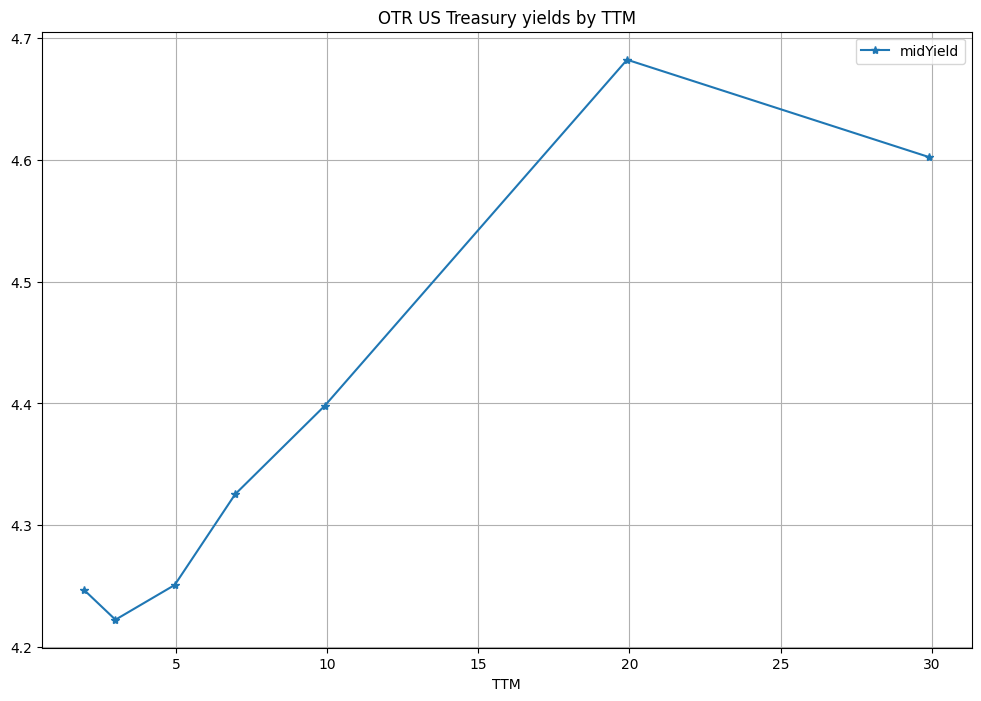

In [134]:
# Merge market data as of 2024-12-13 into treasury OTR symbology
govt_agg_otr = govt_symbology_otr.merge(bond_market_prices_eod,  on=['class','ticker','figi','isin'])

display(govt_symbology_otr)

# Plot a graph/scatter plot of treasury OTR mid yields by TTM
govt_agg_otr.plot(x='TTM', y='midYield', grid=True, style='*-', title='OTR US Treasury yields by TTM', figsize=(12,8))

## c. Load and explore corporate bond market prices and yields

Merge the filtered corporate bonds symbology dataframe with the market data and add the following columns:

| date | bidPrice | askPrice | midPrice | bidYield | askYield | midYield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

List the unique tickers/issuers available in the dataframe.


In [154]:
# Merge market data as of 2024-12-13 into corp symbology
corp_agg = corp_symbology.merge(bond_market_prices_eod,  on=['ticker','figi','isin'])

print(corp_symbology.shape)

display(corp_agg.head())

(124, 11)


,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term,TTM,date,class,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield
0,AAPL,US037833AL42,BBG004HST0K7,AAPL 3.85 05/04/43,APPLE INC,3.850,2013-05-03,2043-05-04,3000.0,30.0,18.39,2024-12-13,Corp,84.586,85.148,0.4490,5.157,5.105,84.8670,5.1310
1,AAPL,US037833AT77,BBG006F8VWJ7,AAPL 4.45 05/06/44,APPLE INC,4.450,2014-05-06,2044-05-06,1000.0,30.0,19.39,2024-12-13,Corp,92.869,93.617,0.4940,5.030,4.966,93.2430,4.9980
2,AAPL,US037833BA77,BBG0081TNL50,AAPL 3.45 02/09/45,APPLE INC,3.450,2015-02-09,2045-02-09,2000.0,30.0,20.16,2024-12-13,Corp,78.309,78.915,1.2170,5.200,5.143,78.6120,5.1715
3,AAPL,US037833BH21,BBG008N1BQC1,AAPL 4 3/8 05/13/45,APPLE INC,4.375,2015-05-13,2045-05-13,2000.0,30.0,20.41,2024-12-13,Corp,89.877,90.517,0.4010,5.184,5.130,90.1970,5.1570
4,AAPL,US037833BY53,BBG00C7QB7Q2,AAPL 3 1/4 02/23/26,APPLE INC,3.250,2016-02-23,2026-02-23,3250.0,10.0,1.20,2024-12-13,Corp,98.618,98.771,1.0205,4.455,4.321,98.6945,4.3880


In [155]:
# Unique tickers
corp_agg_unique_tickers = corp_agg[['ticker', 'name']].drop_duplicates()

display(corp_agg_unique_tickers)

,ticker,name
0,AAPL,APPLE INC
39,DIS,WALT DISNEY COMPANY/THE
64,IBM,IBM CORP
90,ORCL,ORACLE CORP


## d. Yield curve plots

Plot a graph/scatter plot of mid yield curves by TTM (one line per ticker/issuer).

Add a separate line for on-the-run US treasury yield curve (risk free curve).

What can you say about the credit issuer yields, compared to US treasury yields?

<Axes: title={'center': 'Corporate Bond Yields by TTM'}, xlabel='TTM', ylabel='midYield'>

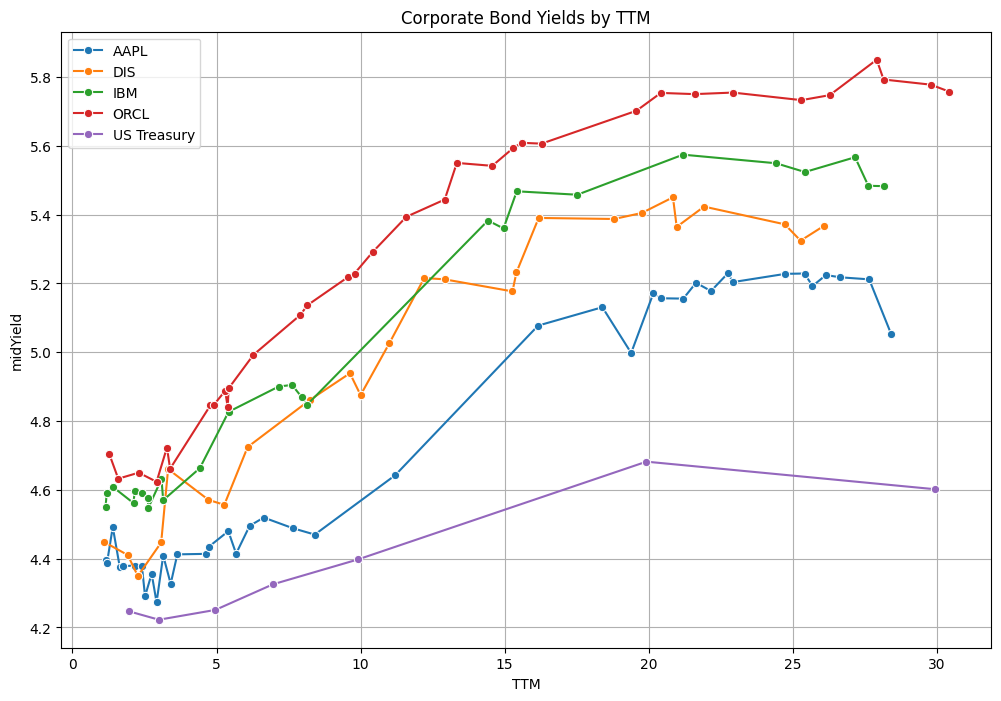

In [157]:
# Plot a graph/scatter plot of ticker yields by TTM
plt.figure(figsize=(12,8))
plt.grid()

# Plot a graph/scatter plot of mid yield curves by TTM (one line per ticker/issuer).
sns.lineplot(data=corp_agg, x='TTM', y='midYield', hue='ticker', marker='o').set_title('Corporate Bond Yields by TTM')

# Add a separate line for on-the-run US treasury yield curve (risk free curve).
sns.lineplot(data=govt_agg_otr, x='TTM', y='midYield', label='US Treasury', marker = 'o')


------------------------------------------------------------------------------------------
# Problem 4: Underying treasury benchmarks and credit spreads

## a. Add underlying benchmark bond mid yields

Start with the corporate bond symbology dataframe. Use the column 'und_bench_yield' to identify the underlying benchmark bond for each bond issue.

Add two new columns to the joint corporate bond dataframe:

| und_bench_yield | credit_spread |
|----------|-------|

where 

*  `und_bench_yield` = underlying benchmark bond mid yield and
*  `credit_spread` = (issue yield - underlying benchmark bond mid yield) * 100.

In [158]:
# Use the column 'und_bench_yield' to identify the underlying benchmark bond for each bond issue.
corp_merged = corp_agg.merge(bond_symbology[['isin', 'und_bench_isin']], on='isin')

# Create df containing govt_benchmark_yields
govt_benchmark_yields = bond_market_prices_eod[bond_market_prices_eod['class'] == 'Govt'][['isin', 'midYield']]
govt_benchmark_yields.rename(columns={'midYield': 'und_bench_yield', 'isin': 'und_bench_isin'}, inplace=True)

# Add benchmark bond yield
corp_merged = corp_merged.merge(govt_benchmark_yields, on='und_bench_isin')
corp_merged['credit_spread'] = (corp_merged['midYield'] - corp_merged['und_bench_yield']) * 100
display(corp_merged[['ticker', 'isin', 'figi', 'security', 'und_bench_isin', 'midYield', 'und_bench_yield', 'credit_spread']])



,ticker,isin,figi,security,und_bench_isin,midYield,und_bench_yield,credit_spread
0,AAPL,US037833AL42,BBG004HST0K7,AAPL 3.85 05/04/43,US912810UF39,5.1310,4.6820,44.90
1,AAPL,US037833AT77,BBG006F8VWJ7,AAPL 4.45 05/06/44,US912810UF39,4.9980,4.6820,31.60
2,AAPL,US037833BA77,BBG0081TNL50,AAPL 3.45 02/09/45,US912810UF39,5.1715,4.6820,48.95
3,AAPL,US037833BH21,BBG008N1BQC1,AAPL 4 3/8 05/13/45,US912810UF39,5.1570,4.6820,47.50
4,AAPL,US037833BY53,BBG00C7QB7Q2,AAPL 3 1/4 02/23/26,US91282CLY56,4.3880,4.2470,14.10
...,...,...,...,...,...,...,...,...
119,ORCL,US68389XCP87,BBG01DZ9FPR1,ORCL 4.9 02/06/33,US91282CLW90,5.1365,4.3980,73.85
120,ORCL,US68389XCQ60,BBG01DZ9FPY3,ORCL 5.55 02/06/53,US912810UC08,5.7930,4.6105,118.25
121,ORCL,US68389XCS27,BBG01Q0P7VR0,ORCL 4.2 09/27/29,US91282CMA61,4.8460,4.2510,59.50
122,ORCL,US68389XCT00,BBG01Q0P7W61,ORCL 4.7 09/27/34,US91282CLW90,5.2290,4.3980,83.10


## b. Credit spread curve plots

Plot a graph/scatter plot of credit spread curves by TTM (one line per issuer).


Text(0.5, 1.0, 'Corporate Bond Credit Spreads by TTM')

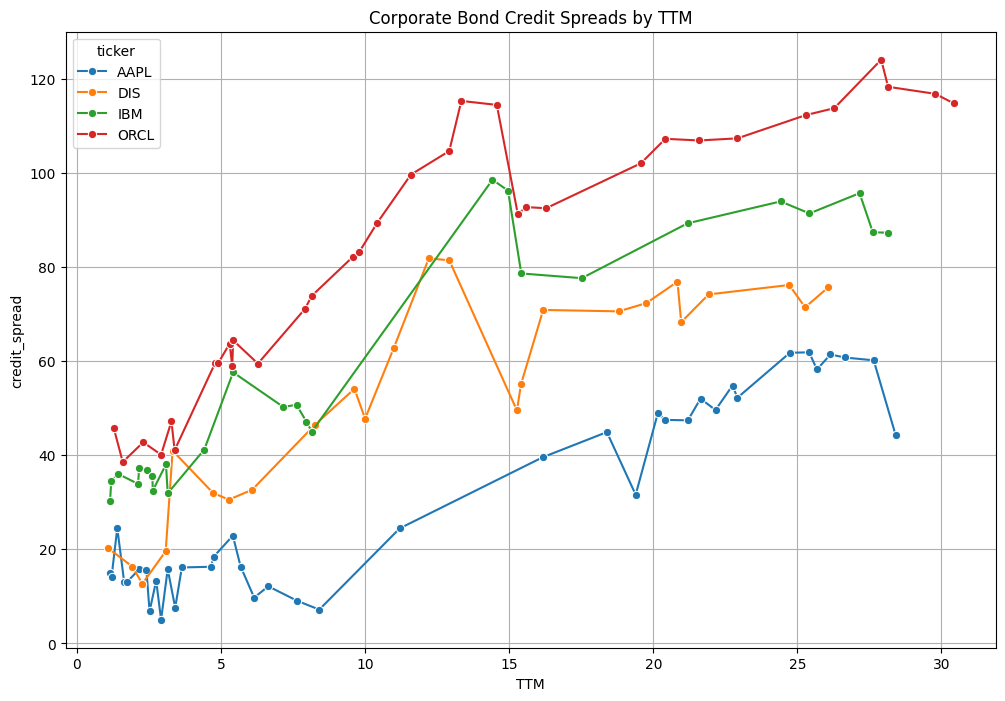

In [159]:
# Plot a graph/scatter plot of credit spreads by TTM
plt.figure(figsize=(12,8))
plt.grid()

# Plot a graph/scatter plot of credit spread curves by TTM (one line per issuer).
sns.lineplot(data=corp_merged, x='TTM', y='credit_spread', hue='ticker', marker='o').set_title('Corporate Bond Credit Spreads by TTM')


## c. Add g-spreads

Add two new columns to the joint corporate bond dataframe:

| interp_tsy_yield | g_spread |
|----------|-------|

where 

*  `interp_tsy_yield` = interpolated treasury yield (using on-the-run treasuries only), matching the issue maturity
*  `g_spread` = (issue yield - interp_tsy_yield) * 100.

In [160]:
# Interpolate OTR Treasury yields on corporate bond TTMs
interp_tsy_yield_vec = np.interp(corp_merged['TTM'], govt_agg_otr['TTM'], govt_agg_otr['midYield'])

# Add interp_tsy_yield and g_spread
corp_merged['interp_tsy_yield'] = interp_tsy_yield_vec
corp_merged['g_spread'] = (corp_merged['midYield'] - corp_merged['interp_tsy_yield']) * 100

# Display results
display(corp_merged[['ticker', 'isin', 'figi', 'security', 'und_bench_isin', 'midYield', 'und_bench_yield', 'credit_spread', 'interp_tsy_yield', 'g_spread']])

,ticker,isin,figi,security,und_bench_isin,midYield,und_bench_yield,credit_spread,interp_tsy_yield,g_spread
0,AAPL,US037833AL42,BBG004HST0K7,AAPL 3.85 05/04/43,US912810UF39,5.1310,4.6820,44.90,4.638548,49.245200
1,AAPL,US037833AT77,BBG006F8VWJ7,AAPL 4.45 05/06/44,US912810UF39,4.9980,4.6820,31.60,4.666948,33.105200
2,AAPL,US037833BA77,BBG0081TNL50,AAPL 3.45 02/09/45,US912810UF39,5.1715,4.6820,48.95,4.680080,49.142000
3,AAPL,US037833BH21,BBG008N1BQC1,AAPL 4 3/8 05/13/45,US912810UF39,5.1570,4.6820,47.50,4.678080,47.892000
4,AAPL,US037833BY53,BBG00C7QB7Q2,AAPL 3 1/4 02/23/26,US91282CLY56,4.3880,4.2470,14.10,4.247000,14.100000
...,...,...,...,...,...,...,...,...,...,...
119,ORCL,US68389XCP87,BBG01DZ9FPR1,ORCL 4.9 02/06/33,US91282CLW90,5.1365,4.3980,73.85,4.354647,78.185304
120,ORCL,US68389XCQ60,BBG01DZ9FPY3,ORCL 5.55 02/06/53,US912810UC08,5.7930,4.6105,118.25,4.616160,117.684000
121,ORCL,US68389XCS27,BBG01Q0P7VR0,ORCL 4.2 09/27/29,US91282CMA61,4.8460,4.2510,59.50,4.248528,59.747194
122,ORCL,US68389XCT00,BBG01Q0P7W61,ORCL 4.7 09/27/34,US91282CLW90,5.2290,4.3980,83.10,4.394816,83.418412


## d. G-spread curve plots

Plot a graph/scatter plot of g-spread curves by TTM (one line per issuer).


Text(0.5, 1.0, 'Corporate Bond G-Spreads by TTM')

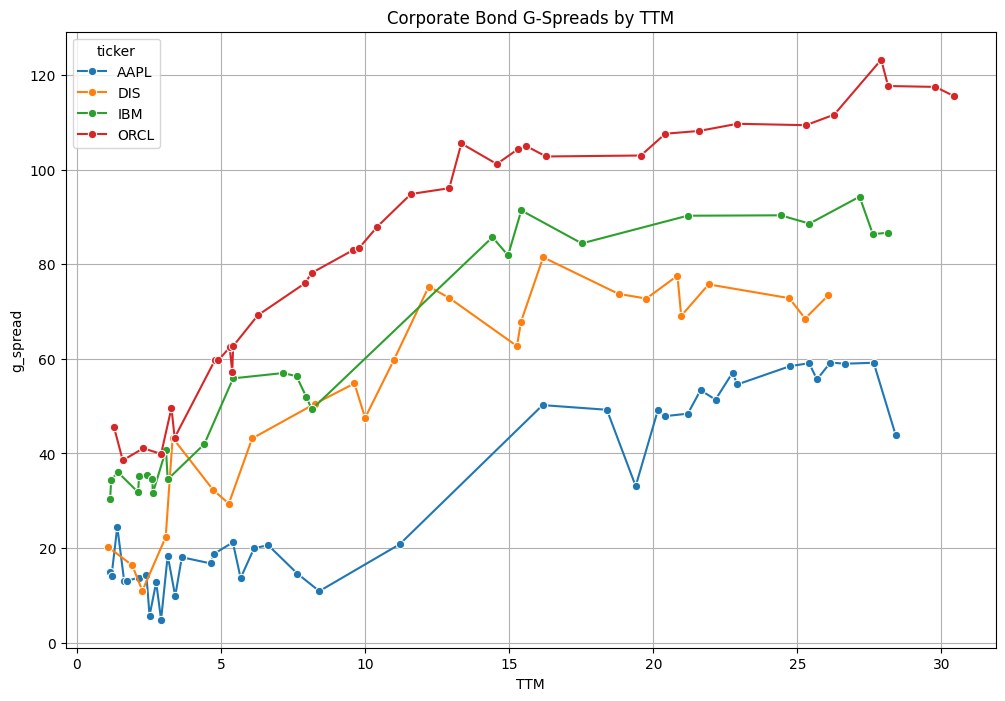

In [161]:
# Plot a graph/scatter plot of g-spreads by TTM
plt.figure(figsize=(12,8))
plt.grid()

# Plot a graph/scatter plot of g-spread curves by TTM (one line per issuer).
sns.lineplot(data=corp_merged, x='TTM', y='g_spread', hue='ticker', marker='o').set_title('Corporate Bond G-Spreads by TTM')